In [146]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [147]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [148]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [149]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [150]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

/var/folders/lc/lbxzt0vd3676j54rdhcvk8vh0000gn/T/ipykernel_59354/3646528746.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  base.prepare(engine, reflect = True)


In [151]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [152]:
# Save references to each table
analysis = base.classes.measurement
station = base.classes.station

In [153]:
# Create our session (link) from Python to the DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [154]:
# Find the most recent date in the data set.
latest_data = session.query(analysis.date).order_by(analysis.date.desc()).first()
latest_data

('2017-08-23',)

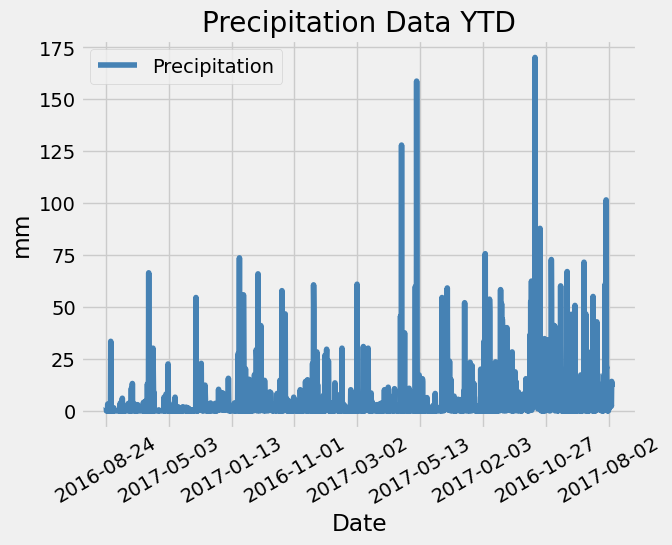

In [155]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve_months = dt.date(2017,8,23) - dt.timedelta(days = 365)
precipitation = session.query(analysis.date, analysis.prcp).filter(analysis.date > last_twelve_months).\
order_by(analysis.date).all()
precipitation[0]

# Calculate the date one year from the last date in data set.
precip_ytd = session.query(analysis.date, analysis.prcp).filter(analysis.date >= "2016-08-24").\
filter(analysis.date <="2017-08-23").all()

# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_ytd_df = pd.DataFrame(precip_ytd)

precip_ytd_df.head()

# Sort the dataframe by date
precip_ytd_df = precip_ytd_df.dropna()
precip_ytd_df


# Use Pandas Plotting with Matplotlib to plot the data
precip_ytd_df.plot(x="date", y="prcp", rot=30, color="steelblue")

plt.xlabel("Date")
plt.ylabel("mm")
plt.title("Precipitation Data YTD")
plt.legend(["Precipitation"])


plt.show()

In [156]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_ytd_df.describe()

,prcp
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [157]:
# Design a query to calculate the total number of stations in the dataset
station_total = session.query(station.id).count()
print(f'There are a total of {station_total} stations in the dataset')

There are a total of 9 stations in the dataset


In [158]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(analysis.station, func.count(analysis.station)).\
group_by(analysis.station).order_by(func.count(analysis.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [159]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = 'USC00519281'
session.query(func.min(analysis.tobs),func.max(analysis.tobs),func.avg(analysis.tobs)).filter(analysis.station == most_active_station).all()

[(12.2, 29.4, 22.03582251082252)]

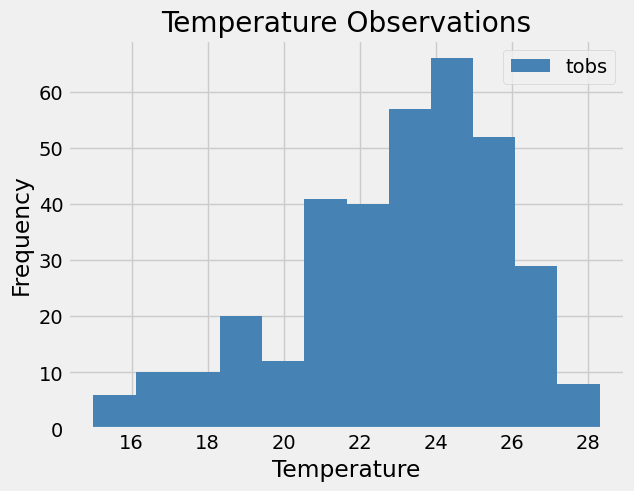

In [160]:
# Query the last 12 months of temperature observation data for the most active station
station_observations = active_stations[0][0]

active_stations_analysis = session.query(analysis.date, analysis.tobs).\
    filter(analysis.date >= "2016-08-24").\
    filter(analysis.date <= "2017-08-23").\
    filter(analysis.station == station_observations).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
active_stations_analysis_df = pd.DataFrame(active_stations_analysis, columns=["Date", "Temperature"])

# Plot the histogram
active_stations_analysis_df.plot.hist(bins=12, color="steelblue")

# Add labels and title to the plot
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Observations")
plt.legend(["tobs"])

plt.show()


# Close Session

In [161]:
# Close Session
session.close()